## Sales Data Analysis Project

### Introduction
This project involves the analysis of a sales dataset to uncover insights and trends. We will perform data cleaning and preprocessing to ensure the data is ready for analysis, followed by exploratory data analysis (EDA) and time series forecasting.

### Data Source
The dataset contains information related to Sales, Profits and other interesting facts of a Superstore giant from [Kaggle.com](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download).

### Objectives
1. Clean and preprocess the data to handle any missing values, duplicates, and inconsistencies.
2. Perform feature engineering to create new useful features.
3. Conduct exploratory data analysis to understand trends and patterns.
4. Forecast future sales using time series analysis.


### Import Libraries and Load the Data

We begin by importing the necessary Python librariries and loading the dataset into a Pandas DataFrame. The data is encoded in `latin1` to handle any special characters that might cause issues with the default `utf-8` encoding.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better visualization
%matplotlib inline

# Load the data with a latin1 encoding as utf-8 did not work
try:
    data = pd.read_csv('/Users/rwilcox/GitHub/rjwilcoxdata/Data-Analytics-Portfolio/Project1/data/Superstore.csv', encoding='latin1')
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

# Display the first few rows of the dataset
data.head()


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Data loaded successfully.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Data Cleaning and Preprocessing

#### Step 1: Check for Missing Values

Before we start analyzing the data, it is crucial to check for any missing values. Missing values can affect the results of our analysis, so we need to handle them appropriately.

We will use the `isnull()` function to check for missing values in each column and the `sum()` function to get the total count of missing values per column.


In [2]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Step 2: Handle Missing Values

Depending on the results from the previous step, we will decide how to handle the missing values. Common strategies include:

- Dropping rows with missing values
- Imputing missing values with appropriate values (e.g., mean, median, mode)

For this dataset, we would drop any rows with missing values using the `.dropna()` method.


In [3]:
# Drop rows with missing values
data.dropna(inplace=True)

However, since there are no missing values in the dataset, we can proceed to the next steps without needing to handle missing data.

#### Step 3: Handle Duplicates

It is important to check for and handle any duplicate rows in the dataset to ensure the accuracy of our analysis. Duplicate rows can occur due to data entry errors or merging datasets.


In [4]:
# Check for duplicate rows
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

# Drop duplicate rows
data = data.drop_duplicates()


Number of duplicate rows: 0


#### Step 4: Convert Data Types

Next, we need to ensure that the `Order Date` and `Ship Date` columns are in datetime format. This will allow us to perform time series analysis and other date-related operations more efficiently.

We will use the `pd.to_datetime()` function to convert these columns to datetime format.


In [5]:
# Convert date columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

These functions take the `Order Date` and `Ship Date` columns as an input and converts them to datetime objects.

Converting to datetime format allows us to perform operations such as extracting the year, month, day, and more complex date manipulations, such as time series analysis.

#### Step 5: Check for Consistency in Dates

Now that we have converted the date columns to datetime format, we need to ensure that the `Ship Date` is always after the `Order Date`. This is important to maintain data consistency, as a ship date before an order date would indicate an error in the data.

We will check for any inconsistencies by comparing the `Ship Date` and `Order Date` columns.


In [6]:
# Check for consistency in dates
inconsistent_dates = data[data['Ship Date'] < data['Order Date']]
inconsistent_dates

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


The above code checks if there are any rows where the `Ship Date` is earlier than the `Order Date`. If there are any inconsistencies, we will need to investigate and possibly correct them.

- `data['Ship Date'] < data['Order Date']`: This condition checks if the `Ship Date` is earlier than the `Order Date`.
- `data[data['Ship Date'] < data['Order Date']]`: This filters the DataFrame to include only those rows where the condition is true.

If the resulting DataFrame `inconsistent_dates` is empty, it means all dates are consistent. If it contains rows, we need to review and correct the inconsistencies.


#### Step 6: Feature Engineering

Feature engineering involves creating new features from the existing data to help improve our analysis. In this step, we will extract the year and month from the `Order Date` column and create new columns for these values.

This will allow us to analyze sales trends on a yearly and monthly basis.


In [7]:
# Extract year and month from the Order Date
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

We have created two new columns: `Order Year` and `Order Month`. These columns will help us analyze sales trends on a yearly and monthly basis.


### Step 7: Visualization of Feature Engineering

To understand the distribution of the newly created features, we will visualize the `Order Year` and `Order Month` columns using count plots.

- **Distribution of Order Year**: This plot shows the number of orders for each year in the dataset. It helps us understand if there is a trend in the number of orders over time.
- **Distribution of Order Month**: This plot shows the number of orders for each month. It helps identify any seasonal patterns or trends within a year.

By visualizing these features, we can gain insights into how orders are distributed over time and prepare for further analysis.


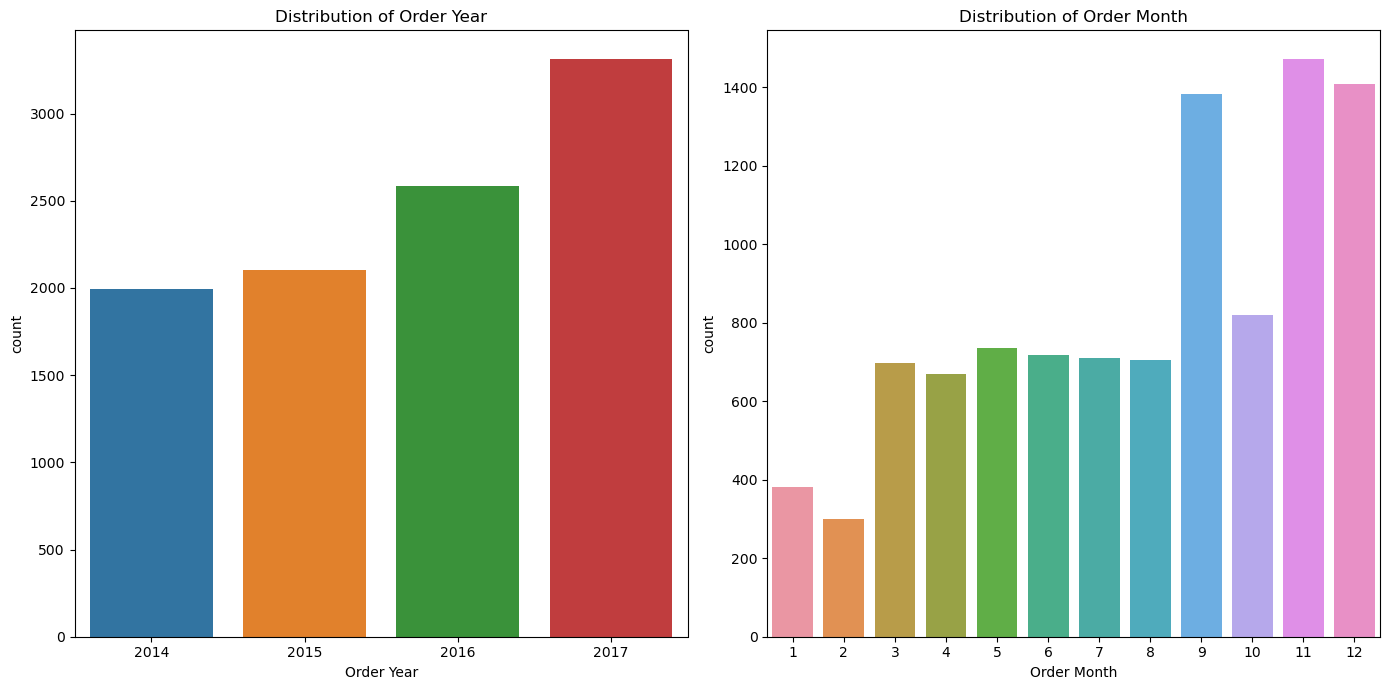

In [8]:
# Visualize the distribution of Order Year and Order Month
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='Order Year', data=data)
plt.title('Distribution of Order Year')

plt.subplot(1, 2, 2)
sns.countplot(x='Order Month', data=data)
plt.title('Distribution of Order Month')

plt.tight_layout()
plt.show()


### Exploratory Data Analysis (EDA)

#### Step 1: Sales Trends Over Time

To understand the overall trend in sales over time, we will plot the sales data using a line plot. This visualization will help us identify any patterns or trends in the sales data over the entire time period.

We will use the `sns.lineplot()` function from the seaborn library to create the plot.


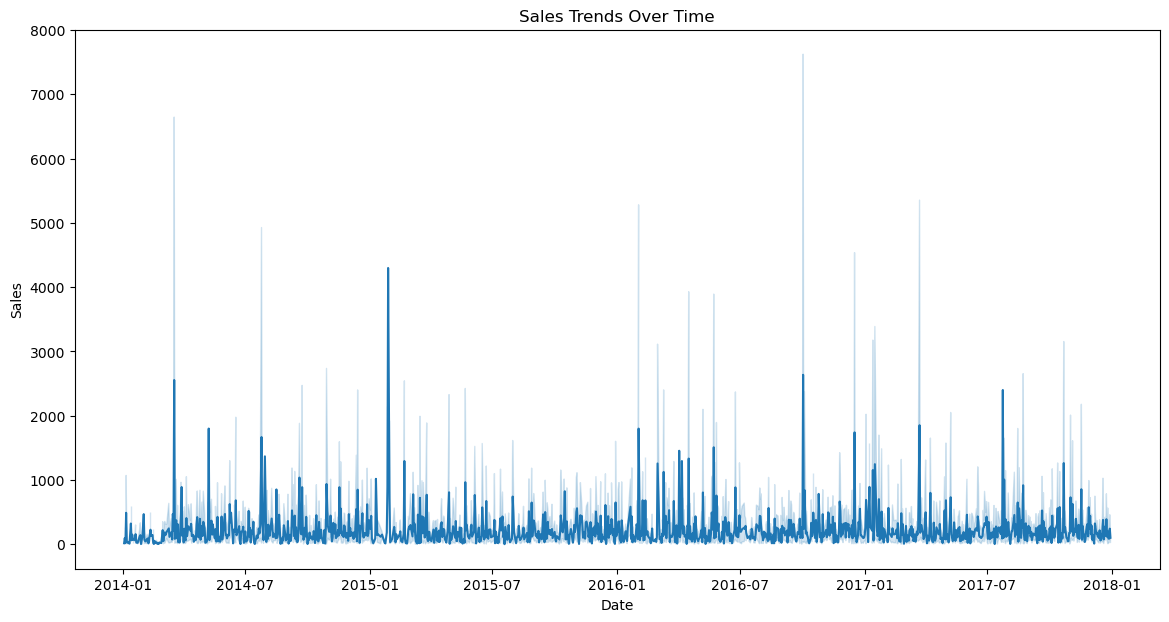

In [9]:
# Plot sales trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Date', y='Sales', data=data)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


#### Step 2: Monthly Sales Trends

Next, we will analyze the sales trends on a monthly basis to identify any seasonality in the data. By grouping the sales data by year and month, we can visualize how sales vary throughout the year and compare different years.

We will use the `groupby()` function to group the data by year and month, and then create a line plot with seaborn.


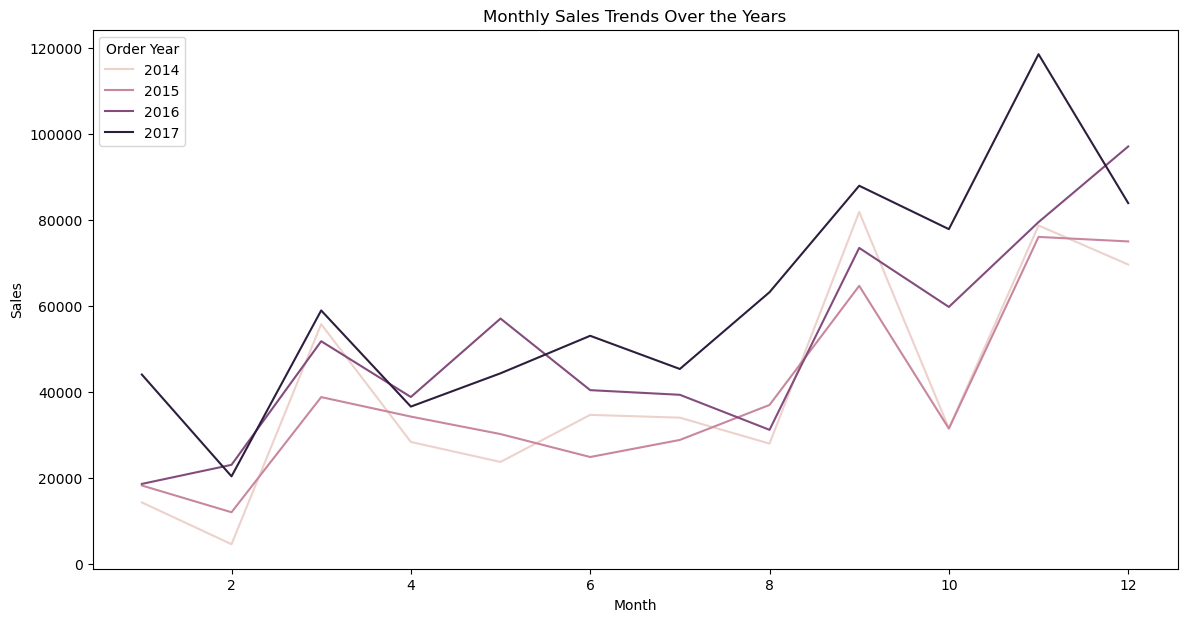

In [10]:
# Group by year and month to see seasonal patterns
monthly_sales = data.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='Order Month', y='Sales', hue='Order Year', data=monthly_sales)
plt.title('Monthly Sales Trends Over the Years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

### Time Series Analysis and Forecasting

#### Step 1: Decompose Time Series

To better understand the components of our time series data, we will decompose it into trend, seasonality, and residual components. This decomposition will help us visualize the underlying patterns in the data.

We will use the `seasonal_decompose` function from the `statsmodels` library to perform the decomposition.


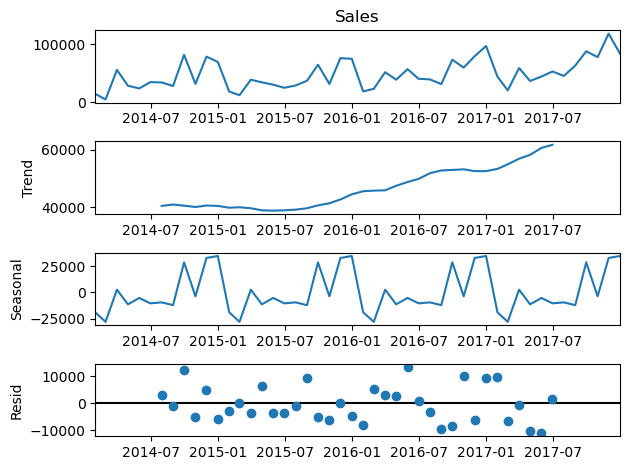

In [11]:
import statsmodels.api as sm

# Set the Order Date as the index
data.set_index('Order Date', inplace=True)

# Resample the data to monthly frequency
monthly_data = data['Sales'].resample('M').sum()

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')
decomposition.plot()
plt.show()

#### Step 2: Forecast Future Sales

Finally, we will use a time series forecasting model to predict future sales. One common model for time series forecasting is the ARIMA model.

We will use the `ARIMA` class from the `statsmodels` library to fit the model to our data and forecast the next 12 months of sales.


In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(monthly_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
forecast

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2018-01-31    77576.061061
2018-02-28    82260.907005
2018-03-31    79085.524037
2018-04-30    77181.267273
2018-05-31    91222.329399
2018-06-30    85192.547592
2018-07-31    83226.056339
2018-08-31    85814.070171
2018-09-30    82677.685645
2018-10-31    81117.118064
2018-11-30    85149.750965
2018-12-31    83839.154504
Freq: M, Name: predicted_mean, dtype: float64